In [1]:
### BREAST CANCER CASES ###
###### Random Forest CODE IN JUPYTER NOTEBOOK #####

In [2]:
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import keras
import tensorflow as tf
import warnings

In [3]:
# Code
BC = (pd.read_excel('cancer.xlsx'))

In [4]:
BC.head()

,PatStatus,Race,MarST,Gender,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
0,1,3,1,0,52,3,0,5,1,4,...,1,1,5,1,1,1,1,2,1,1
1,1,3,1,0,48,3,0,4,3,5,...,1,1,1,1,0,1,0,1,0,1
2,0,3,0,0,69,2,0,7,9,8,...,1,0,1,1,1,1,1,2,1,1
3,1,3,0,0,47,2,0,15,9,9,...,1,1,2,0,1,1,0,1,0,1
4,1,3,0,0,66,3,0,9,5,4,...,1,0,6,1,1,1,0,1,0,0


In [5]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np


In [6]:
y = BC.PatStatus
x = BC.drop(['PatStatus'], axis = 1)

In [7]:
#Split the data into train and test sets #
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=123)


## Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)

In [8]:
x_train = x_train_minmax
x_test = x_test_minmax

In [9]:
x_train.shape

(80001, 24)

In [10]:
x_test.shape

(20001, 24)

In [15]:
## Fitting the model
## Models required 
from keras.applications.imagenet_utils import decode_predictions 
import tensorflow as tf
from hyperas.distributions import choice, uniform
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
rand_forest_model=clf.fit(x_train,y_train)
rand_forest_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
# predict with splitted test data
y_pred = clf.predict(x_test)

In [17]:
##Fitting the neural network model using training dataset
tns_probs=[0 for _ in range(len(y_test))]

In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9031048447577621


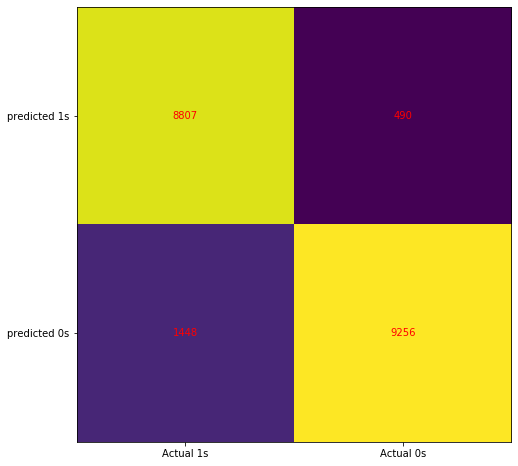

In [19]:
## CONFUSION MATRIX FOR BOTH SEX DATA
test_cm = confusion_matrix(y_test, np.round(y_pred))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(test_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, test_cm[i, j], ha= 'center', va= 'center', color= 'red')
plt.show()

In [20]:
## Error for the prediction for test dataset outcomes
test_error = (test_cm[0,1] + test_cm[1,0])/np.sum(test_cm)
print(test_error)

0.0968951552422379


In [21]:
## Accuracy of prediction
1-test_error

0.9031048447577621

In [22]:
## Sensitivity Analysis 
test_sens = test_cm[1, 1]/(test_cm[1, 1] + test_cm[0, 1])
print(test_sens)

0.9497229632669814


In [23]:
## Specificity Analysis
test_spec = test_cm[0, 0]/(test_cm[0, 0]+test_cm[1, 0])
print(test_spec)

0.8588005850804485


In [24]:
## PPV Analysis
test_npv = test_cm[1, 1]/(test_cm[1, 1] + test_cm[1, 0])
print(test_npv)

0.8647234678624813


In [25]:
## NPV Analysis
test_npv = test_cm[0, 0]/(test_cm[0, 0]+test_cm[0, 1])
print(test_npv)

0.94729482628805


In [26]:
## The AUC Score
test_auc = roc_auc_score(y_test, tns_probs)
y_pred_auc = np.round(roc_auc_score(y_test, y_pred), decimals = 2)

In [27]:
## calculate ROC Curves
test_fpr, test_tpr, _ = roc_curve(y_test, tns_probs)
y_pred_fpr, y_pred_tpr, _ = roc_curve(y_test, y_pred)

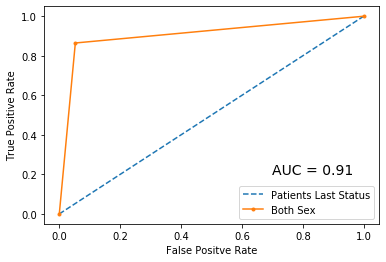

In [28]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(test_fpr, test_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(y_pred_fpr, y_pred_tpr, marker = '.', label = 'Both Sex')
plt.text(0.7, 0.2, "AUC = " + str(y_pred_auc), fontsize = 14)

## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")

## Show Legend
plt.legend()

In [1]:
## CONSIDER THE NEURAL NETWORK FOR EACH GENDER SEPARATELY
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Code
MBC = (pd.read_excel('MBC.xlsx'))

In [3]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split
#Import numpy#
import numpy as np

In [4]:
#### THE MALE DATASET 
my=MBC.PatStatus
mx=MBC.drop(['PatStatus', 'Gender'], axis=1)

In [5]:
## CONSIDER RBF FITTING FOR THE MALE GENDER

In [6]:
#Split the Male data into train and test sets #
mx_train, mx_test, my_train, my_test=train_test_split(mx,my, test_size=0.2, random_state=124)


In [7]:
mx_train.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
12535,5,0,75,3,0,10,9,9,1,0,...,1,0,2,0,1,1,0,1,0,1
12133,1,0,64,2,0,16,9,9,1,0,...,1,0,2,1,1,1,0,1,0,1
12924,1,0,88,3,0,10,9,4,1,0,...,1,0,2,1,1,0,0,1,0,1
3857,1,0,59,3,0,15,9,9,1,0,...,1,1,3,1,1,1,0,1,1,0
2532,1,1,50,3,0,15,1,3,1,0,...,1,0,3,1,1,1,0,1,0,0


In [8]:
mx_test.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
738,1,1,52,3,0,1,8,9,1,1,...,1,0,1,1,0,0,0,2,0,1
4352,1,0,87,3,0,10,9,2,1,0,...,1,0,3,1,1,1,0,1,1,0
14248,1,1,55,1,0,15,9,8,1,0,...,1,0,2,1,1,1,0,1,0,1
1058,2,1,46,3,1,5,5,4,1,0,...,1,0,1,1,0,1,0,1,0,1
14218,5,0,66,2,0,16,9,4,1,0,...,1,0,2,1,1,0,0,1,0,1


In [9]:
mx_train.shape

(8224, 23)

In [10]:
mx_test.shape

(2056, 23)

In [11]:
## Scaling the male data set
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
mx_train_minmax = min_max_scaler.fit_transform(mx_train)
mx_test_minmax = min_max_scaler.fit_transform(mx_test)

In [12]:
mx_train = mx_train_minmax
mx_test = mx_test_minmax

mx_train = np.array(mx_train)
mx_test = np.array(mx_test)
my_train = np.array(my_train)
my_test = np.array(my_test)

In [13]:
## FITTING NEURAL NETWORK FOR MALE DATA

In [14]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [15]:
##Fitting the neural network model using training dataset
tns_probs=[0 for _ in range(len(my_test))]

In [16]:
## Fitting the model
## Models required 
from keras.applications.imagenet_utils import decode_predictions 
import tensorflow as tf
from hyperas.distributions import choice, uniform
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 5)

#Train the model using the training sets
mrand_forest_model=clf.fit(mx_train, my_train)
mrand_forest_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [17]:
### PREDICTION USING THE TEST DATASET

In [18]:
# predict with splitted test data
my_pred = clf.predict(mx_test)

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(my_test, my_pred))

Accuracy: 0.9494163424124513


In [20]:
# feature importance variable 
import pandas as pd
MBC = pd.DataFrame(MBC.values, columns=[["PatStatus", 
                                         "Race","MarST",
                                         "Gender", 
                                         "AgeDiag",
                                         "Grade",
                                         "Stability",
                                         "No.Visits",
                                         "Lstay",
                                         "Laterality",
                                         "FamHist",
                                         "PrioBSurgy",
                                         "Suture",
                                         "Density",
                                         "NipRet",
                                         "LyNode", 
                                         "Amorph",
                                         "Size",
                                         "Eggshell",
                                         "Milk",
                                         "AxiAden",
                                         "Distroph",
                                         "Lucent",
                                         "Dermal",
                                         "SkinnLesson"
]])

feature_imp = pd.Series(clf.feature_importances_, index = [ 
                                         "Race",
                                         "MarST", 
                                         "AgeDiag",
                                         "Grade",
                                         "Stability",
                                         "No.Visits",
                                         "Lstay",
                                         "Laterality",
                                         "FamHist",
                                         "PrioBSurgy",
                                         "Suture",
                                         "Density",
                                         "NipRet",
                                         "LyNode", 
                                         "Amorph",
                                         "Size",
                                         "Eggshell",
                                         "Milk",
                                         "AxiAden",
                                         "Distroph",
                                         "Lucent",
                                         "Dermal",
                                         "SkinnLesson"]).sort_values(ascending =False)



In [21]:
feature_imp

SkinnLesson    0.349386
Size           0.227863
Lstay          0.103242
No.Visits      0.051164
Milk           0.039392
AgeDiag        0.035818
Amorph         0.026599
Density        0.023298
Lucent         0.020689
Laterality     0.018861
Race           0.014629
LyNode         0.014476
NipRet         0.010778
Grade          0.010599
PrioBSurgy     0.010189
Stability      0.009298
AxiAden        0.006768
MarST          0.006625
Distroph       0.005998
Suture         0.005569
Dermal         0.005270
Eggshell       0.003468
FamHist        0.000021
dtype: float64

In [22]:
# List of features for later use
feature_list = list(MBC.columns)

# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# list of x locations for plotting
x_values = list(range(len(importances)))

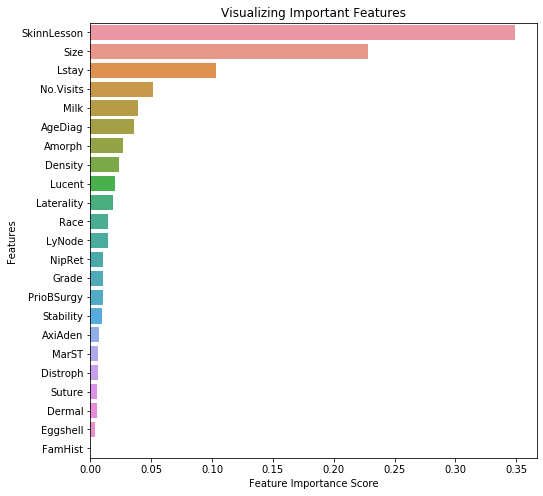

In [23]:
# use the feature importance variable to see feature importance scores
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,8))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [24]:
##Fitting the neural network model using training dataset
tns_probs=[0 for _ in range(len(my_test))]

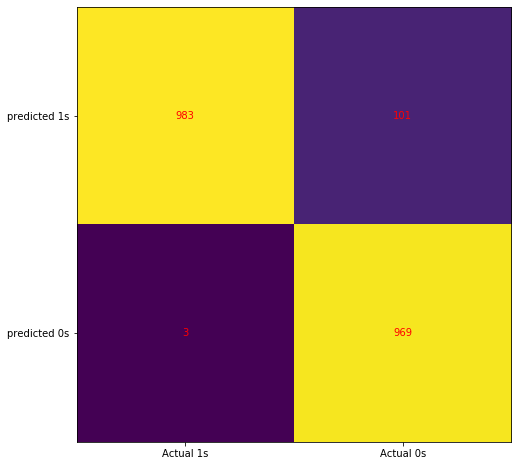

In [26]:
## CONFUSION MATRIX FOR MALE DATA
mtest_cm = confusion_matrix(my_test, np.round(my_pred))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(mtest_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, mtest_cm[i, j], ha= 'center', va= 'center', color= 'red')
plt.show()

In [27]:
## Error for the prediction for test dataset outcomes
mtest_error = (mtest_cm[0,1] + mtest_cm[1,0])/np.sum(mtest_cm)
print(mtest_error)

0.05058365758754864


In [28]:
## Accuracy of prediction
1-mtest_error

0.9494163424124513

In [29]:
## Sensitivity Analysis 
mtest_sens = mtest_cm[1, 1]/(mtest_cm[1, 1] + mtest_cm[0, 1])
print(mtest_sens)

0.905607476635514


In [30]:
## Specificity Analysis
mtest_spec = mtest_cm[0, 0]/(mtest_cm[0, 0]+ mtest_cm[1, 0])
print(mtest_spec)

0.9969574036511156


In [31]:
## PPV Analysis
mtest_npv = mtest_cm[1, 1]/(mtest_cm[1, 1] + mtest_cm[1, 0])
print(mtest_npv)

0.9969135802469136


In [32]:
## NPV Analysis
mtest_npv = mtest_cm[0, 0]/(mtest_cm[0, 0] + mtest_cm[0, 1])
print(mtest_npv)

0.9068265682656826


In [33]:
## The AUC Score
mtest_auc = roc_auc_score(my_test, tns_probs)
my_pred_auc = np.round(roc_auc_score(my_test, my_pred), decimals = 2)

In [34]:
## calculate ROC Curves
mtest_fpr, mtest_tpr, _ = roc_curve(my_test, tns_probs)
my_pred_fpr, my_pred_tpr, _ = roc_curve(my_test, my_pred)

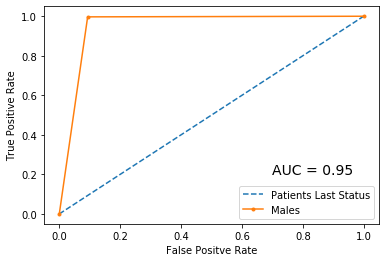

In [35]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mtest_fpr, mtest_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(my_pred_fpr, my_pred_tpr, marker = '.', label = 'Males')
plt.text(0.7, 0.2, "AUC = " + str(my_pred_auc), fontsize = 14)

## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")

## Show Legend
plt.legend()

In [1]:
## CONSIDERING THE FEMALE DATA
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
FBC = (pd.read_excel('FBC.xlsx'))

fy=FBC.PatStatus
fx=FBC.drop(['PatStatus', 'Gender'],axis=1)

In [2]:
FBC.shape

(84403, 25)

In [3]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np
#Split the Male data into train and test sets #
fx_train, fx_test, fy_train, fy_test=train_test_split(fx,fy, test_size=0.2, random_state=125)


In [4]:
# Scaling the female data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
fx_train_minmax = min_max_scaler.fit_transform(fx_train)
fx_test_minmax = min_max_scaler.fit_transform(fx_test)


In [5]:
fx_train = fx_train_minmax
fx_test = fx_test_minmax

In [6]:
### FITTING THE NEURAL NETWORK USING THE FEMALE TRAINING DATASET 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

tns_probs=[0 for _ in range(len(fy_test))]

In [7]:
## Fitting the model
## Models required 
from keras.applications.imagenet_utils import decode_predictions 
import tensorflow as tf
from hyperas.distributions import choice, uniform
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5, random_state = 5)

#Train the model using the training sets
frand_forest_model=clf.fit(fx_train,fy_train)
frand_forest_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [8]:
## PREDICTION USING THE TEST DATASET

In [9]:
### Getting the prediction for the Testing dataset
fy_pred = clf.predict(fx_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(fy_test, fy_pred))

Accuracy: 0.889402286594396


In [11]:
# feature importance variable 
import pandas as pd
FBC = pd.DataFrame(FBC.values, columns=[["PatStatus", 
                                         "Race","MarST",
                                         "Gender", 
                                         "AgeDiag",
                                         "Grade",
                                         "Stability",
                                         "No.Visits",
                                         "Lstay",
                                         "Laterality",
                                         "FamHist",
                                         "PrioBSurgy",
                                         "Suture",
                                         "Density",
                                         "NipRet",
                                         "LyNode", 
                                         "Amorph",
                                         "Size",
                                         "Eggshell",
                                         "Milk",
                                         "AxiAden",
                                         "Distroph",
                                         "Lucent",
                                         "Dermal",
                                         "SkinnLesson"
]])

feature_imp = pd.Series(clf.feature_importances_, index = [ 
                                         "Race","MarST", 
                                         "AgeDiag",
                                         "Grade",
                                         "Stability",
                                         "No.Visits",
                                         "Lstay",
                                         "Laterality",
                                         "FamHist",
                                         "PrioBSurgy",
                                         "Suture",
                                         "Density",
                                         "NipRet",
                                         "LyNode", 
                                         "Amorph",
                                         "Size",
                                         "Eggshell",
                                         "Milk",
                                         "AxiAden",
                                         "Distroph",
                                         "Lucent",
                                         "Dermal",
                                         "SkinnLesson"]).sort_values(ascending =False)



In [12]:
feature_imp

Lstay          0.132272
Density        0.101575
NipRet         0.100182
No.Visits      0.080408
SkinnLesson    0.077362
AgeDiag        0.071854
Laterality     0.064168
AxiAden        0.063047
Size           0.056779
Amorph         0.036994
LyNode         0.034484
Milk           0.028956
FamHist        0.028135
Lucent         0.019203
Race           0.016249
Suture         0.015950
Distroph       0.014919
PrioBSurgy     0.013072
Grade          0.012817
Eggshell       0.012590
MarST          0.007673
Dermal         0.006710
Stability      0.004602
dtype: float64

In [13]:
# List of features for later use
feature_list = list(FBC.columns)

# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# list of x locations for plotting
x_values = list(range(len(importances)))

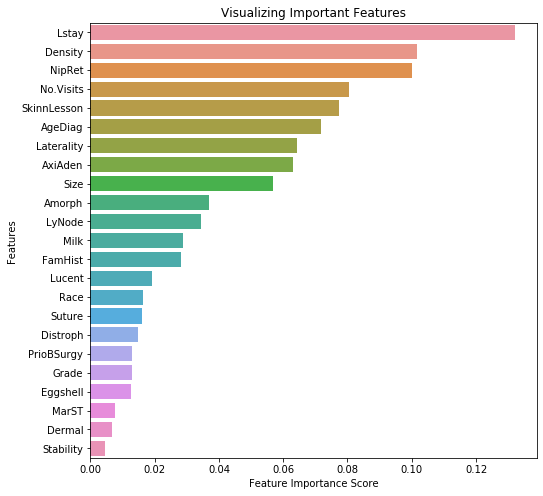

In [14]:
# use the feature importance variable to see feature importance scores
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,8))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

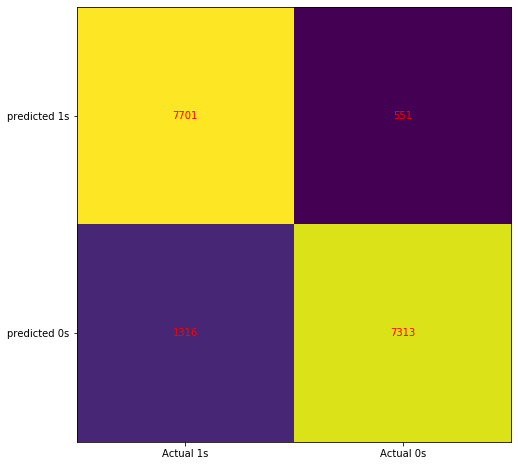

In [15]:
## CONFUSION MATRIX FOR MALE DATA
ftest_cm = confusion_matrix(fy_test, np.round(fy_pred))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(ftest_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, ftest_cm[i, j], ha= 'center', va= 'center', color= 'red')
plt.show()

In [16]:
## Error for the prediction for test dataset outcomes
ftest_error = (ftest_cm[0,1] + ftest_cm[1,0])/np.sum(ftest_cm)
print(ftest_error)

0.11059771340560394


In [17]:
## Accuracy of prediction
1-ftest_error

0.889402286594396

In [18]:
## Sensitivity Analysis 
ftest_sens = ftest_cm[1, 1]/(ftest_cm[1, 1] + ftest_cm[0, 1])
print(ftest_sens)

0.9299338758901322


In [19]:
## Specificity Analysis
ftest_spec = ftest_cm[0, 0]/(ftest_cm[0, 0]+ ftest_cm[1, 0])
print(ftest_spec)

0.8540534545857824


In [20]:
## PPV Analysis
ftest_npv = ftest_cm[1, 1]/(ftest_cm[1, 1] + ftest_cm[1, 0])
print(ftest_npv)

0.8474910186580137


In [21]:
## NPV Analysis
ftest_npv = ftest_cm[0, 0]/(ftest_cm[0, 0] + ftest_cm[0, 1])
print(ftest_npv)

0.9332283082888997


In [22]:
## The AUC Score
ftest_auc = roc_auc_score(fy_test, tns_probs)
fy_pred_auc = np.round(roc_auc_score(fy_test, fy_pred), decimals = 2)

In [23]:
## calculate ROC Curves
ftest_fpr, ftest_tpr, _ = roc_curve(fy_test, tns_probs)
fy_pred_fpr, fy_pred_tpr, _ = roc_curve(fy_test, fy_pred)

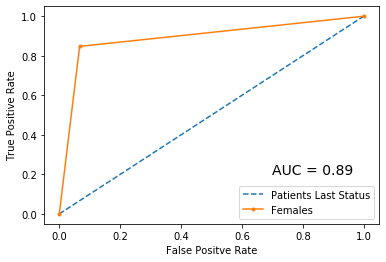

In [24]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(ftest_fpr, ftest_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(fy_pred_fpr, fy_pred_tpr, marker = '.', label = 'Females')
plt.text(0.7, 0.2, "AUC = " + str(fy_pred_auc), fontsize = 14)

## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")

## Show Legend
plt.legend()